# Slab 1D 1g (one group)

## No fissions

$a$ is the half-thickness of the slab, $L = \Sigma_s/D$  

In [126]:
from math import sqrt, cosh, cos, pi, tan, tanh, atan, sinh
import matplotlib.pyplot as plt
from numpy import array

In [127]:
def sol1(x, a, L):
    aux = (1. - cosh(x*L)/cosh(a*L))
    return aux

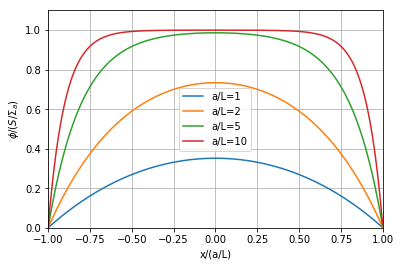

In [128]:

a=1
nb = 1000
dx = 2.*a/nb
xs = array([(-a + dx*i) for i in range(nb)])

for L in [1, 2, 5, 10]:
    plt.plot(xs, [sol1(x, a, L) for x in xs], label=f'a/L={L}')

plt.legend()
plt.grid()
plt.xlim(-1,1)
plt.ylim(0,1.1)
plt.xlabel('x/(a/L)')
plt.ylabel('$\phi/(S/\Sigma_a)$')
plt.draw()

## Fissile material

$\chi^2 = (\nu \Sigma_f - \Sigma_a) / D$

The critical condition is given by $\chi a = \pi / 2$

In [134]:
nuSigf = 1.2
Siga = 1.
D = 0.5

chi = sqrt((nuSigf-Siga)/D)
a = 0.5 * pi / chi
print(f"Critical size a = {a:4.2f}") 

Critical size a = 2.48


In [137]:
def sol2(x):
    if abs(x) <=a:
        return cos(chi*x)
    else:
        return 0.

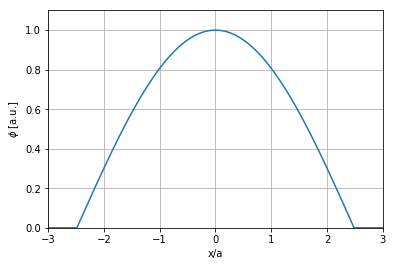

In [138]:
nb = 1000
LL = int(a+1)
dx = 2.*LL/nb
xs = array([(-LL + dx*i) for i in range(nb)])

plt.plot(xs, [sol2(x) for x in xs])

plt.grid()
plt.xlim(-LL,LL)
plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('$\phi$ [a.u.]')
plt.draw()


## Reflected core

$ \phi_I(x) = A \cos (\chi x)$

$\phi_{II}(x) = A \cos(\chi a) / \sinh (b/L) \sinh [(a+b-x)/L]$

$\tan(\chi a) = D_{II}/D_I \coth(b/L) / (\chi L)$



In [131]:
from math import sqrt

b = 1
sig_a_I = 1
sig_a_II = 0.8
nusig_f = 1.2
D_I = 0.5
D_II = 0.8

chi2 = (nusig_f - sig_a_I) / D_I
L2 = D_II/sig_a_II
chi = sqrt(chi2)
L = sqrt(L2)

lhs = tan(chi*a)
rhs = D_II/D_I/chi/L/tanh(b/L)
a = atan(rhs) / chi
print(f"Critical size a = {a:4.2f}") 

Critical size a = 2.02


In [132]:
def sol3(x):
    if abs(x) <= a:
        return cos(chi*x)
    elif abs(x) <= a + b:
        return cos(chi*a) / sinh(b/L) * sinh((a+b-abs(x)) / L)
    else:
        return 0.

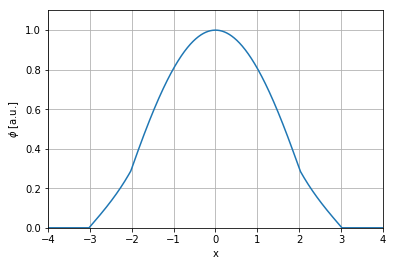

In [133]:
nb = 1000
LL = int(a+b+1)
dx = 2.*LL/nb
xs = array([(-LL + dx*i) for i in range(nb)])

plt.plot(xs, [sol3(x) for x in xs])

plt.grid()
plt.xlim(-LL,LL)
plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('$\phi$ [a.u.]')
plt.draw()
